<a href="https://colab.research.google.com/github/Eltensy/data-science-school-2025/blob/main/Data_Science_School_Planet_Dataset_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

In [ ]:
df = sns.load_dataset('planets')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
df.isna().sum()

,0
method,0
number,0
orbital_period,43
mass,522
distance,227
year,0


In [ ]:
df['orbital_period'] = df['orbital_period'].fillna(df['orbital_period'].mean())
df['mass'] = df['mass'].fillna(df['mass'].mean())
df['distance'] = df['distance'].fillna(df['distance'].mean())
# Заповнив середнім NA значення

df.isna().sum()

,0
method,0
number,0
orbital_period,0
mass,0
distance,0
year,0


In [ ]:
df = pd.get_dummies(df, columns=['method'], dtype=int) # one hot encode

train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42) # 70% train 30% (test + valid)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42) # 30%/2 (15% val, 15% test)
print(f"train: {len(train_df)}, val: {len(val_df)}, test: {len(test_df)}")

train: 724, val: 155, test: 156


In [ ]:
train_df.describe()

,number,orbital_period,mass,distance,year,method_Astrometry,method_Eclipse Timing Variations,method_Imaging,method_Microlensing,method_Orbital Brightness Modulation,method_Pulsar Timing,method_Pulsation Timing Variations,method_Radial Velocity,method_Transit,method_Transit Timing Variations
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,1.809392,2357.185489,2.547061,277.201877,2009.215470,0.001381,0.009669,0.034530,0.020718,0.001381,0.005525,0.001381,0.505525,0.414365,0.005525
std,1.258826,29785.378814,2.382263,674.536989,3.969522,0.037165,0.097920,0.182713,0.142538,0.037165,0.074175,0.037165,0.500315,0.492953,0.074175
min,1.000000,0.240104,0.003600,1.350000,1989.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.929729,1.450000,38.402500,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,35.127050,2.638161,117.470000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.000000,603.850000,2.638161,264.069282,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,7.000000,730000.000000,21.420000,8500.000000,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
numeric_cols = train_df.select_dtypes(include='number').columns

mean = train_df[numeric_cols].mean()
std = train_df[numeric_cols].std()

train_normalized = (train_df - mean) / std
val_normalized = (val_df - mean) / std
test_normalized = (test_df - mean) / std

display(train_normalized)
display(val_normalized)
display(train_normalized)

,number,orbital_period,mass,distance,year,method_Astrometry,method_Eclipse Timing Variations,method_Imaging,method_Microlensing,method_Orbital Brightness Modulation,method_Pulsar Timing,method_Pulsation Timing Variations,method_Radial Velocity,method_Transit,method_Transit Timing Variations
196,-0.642974,-0.079094,0.038241,0.122748,0.953397,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,1.188016,-0.074484
777,0.945808,-0.079067,0.038241,-0.019469,0.701478,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,1.188016,-0.074484
81,0.151417,-0.079009,-1.057843,-0.381153,0.953397,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
790,-0.642974,-0.078893,0.038241,1.560772,0.953397,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,1.188016,-0.074484
662,0.151417,-0.079111,0.038241,-0.154479,0.449558,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,1.188016,-0.074484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.642974,-0.059727,0.038241,-0.019469,0.701478,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
330,0.151417,-0.079002,-1.039092,-0.354854,-0.306200,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
466,0.151417,-0.040164,-1.005918,-0.375149,0.449558,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
121,-0.642974,0.058512,-0.103708,-0.381257,0.953397,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484


,number,orbital_period,mass,distance,year,method_Astrometry,method_Eclipse Timing Variations,method_Imaging,method_Microlensing,method_Orbital Brightness Modulation,method_Pulsar Timing,method_Pulsation Timing Variations,method_Radial Velocity,method_Transit,method_Transit Timing Variations
835,0.151417,-0.052650,0.038241,-0.019469,1.205317,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
873,0.151417,-0.077506,0.038241,-0.019469,0.953397,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,1.188016,-0.074484
572,-0.642974,-0.044367,-0.737559,-0.362281,0.449558,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
298,0.945808,-0.050816,-0.807241,-0.361673,-1.061959,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
915,-0.642974,-0.078967,-0.901269,-0.019469,1.205317,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.642974,-0.024414,0.038241,-0.327472,0.701478,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
109,-0.642974,-0.079008,0.038241,0.730572,0.449558,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,1.188016,-0.074484
39,0.151417,0.107985,0.038241,0.330298,0.197639,-0.037165,10.113708,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,-0.840577,-0.074484
94,-0.642974,-0.078830,0.038241,-0.019469,-0.306200,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,1.188016,-0.074484


,number,orbital_period,mass,distance,year,method_Astrometry,method_Eclipse Timing Variations,method_Imaging,method_Microlensing,method_Orbital Brightness Modulation,method_Pulsar Timing,method_Pulsation Timing Variations,method_Radial Velocity,method_Transit,method_Transit Timing Variations
196,-0.642974,-0.079094,0.038241,0.122748,0.953397,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,1.188016,-0.074484
777,0.945808,-0.079067,0.038241,-0.019469,0.701478,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,1.188016,-0.074484
81,0.151417,-0.079009,-1.057843,-0.381153,0.953397,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
790,-0.642974,-0.078893,0.038241,1.560772,0.953397,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,1.188016,-0.074484
662,0.151417,-0.079111,0.038241,-0.154479,0.449558,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,-1.010413,1.188016,-0.074484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,-0.642974,-0.059727,0.038241,-0.019469,0.701478,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
330,0.151417,-0.079002,-1.039092,-0.354854,-0.306200,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
466,0.151417,-0.040164,-1.005918,-0.375149,0.449558,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484
121,-0.642974,0.058512,-0.103708,-0.381257,0.953397,-0.037165,-0.098739,-0.188987,-0.145352,-0.037165,-0.074484,-0.037165,0.988327,-0.840577,-0.074484


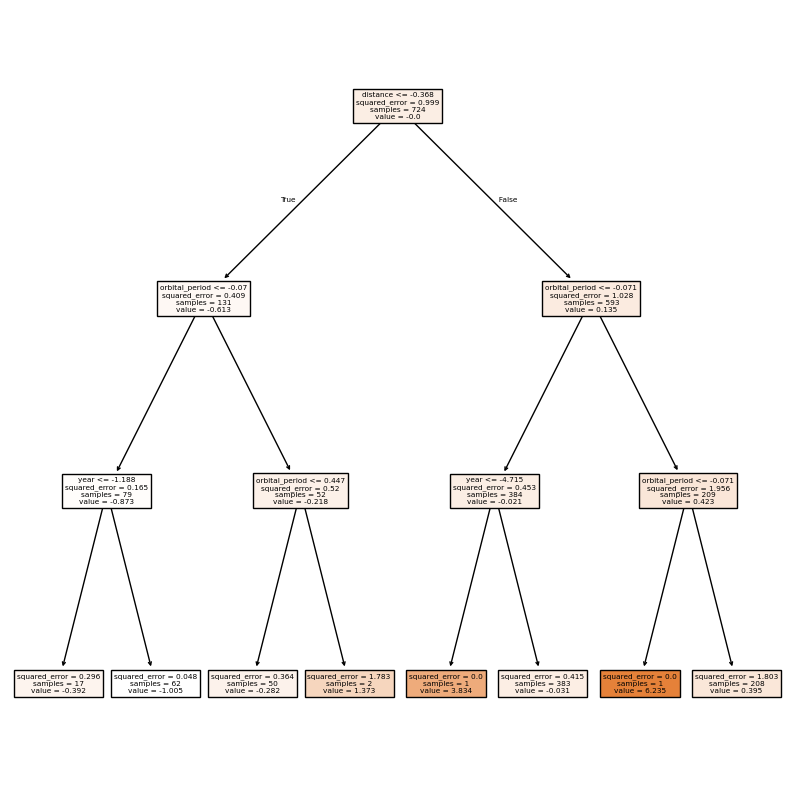

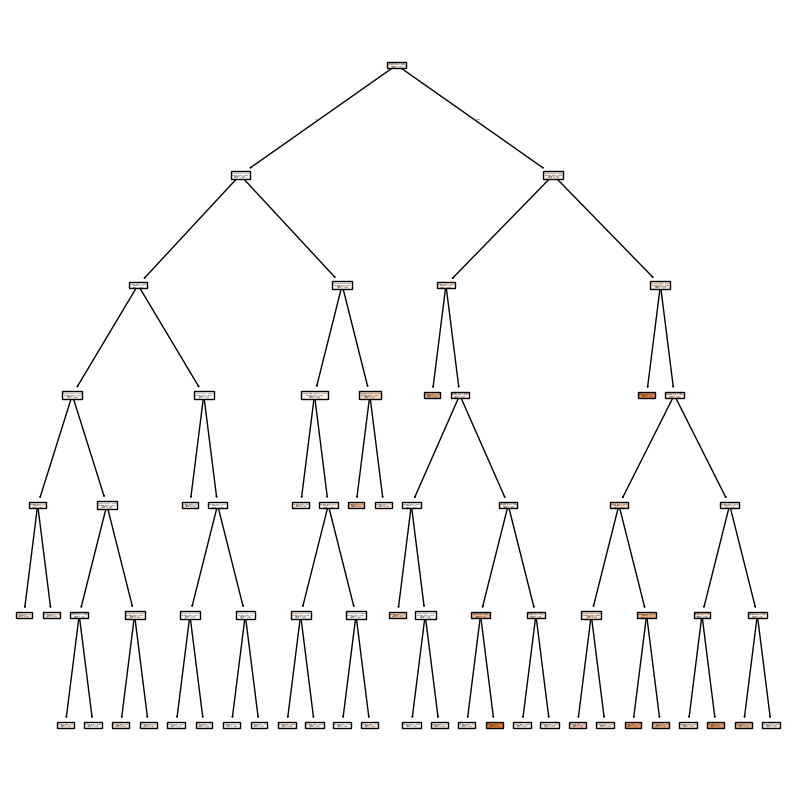

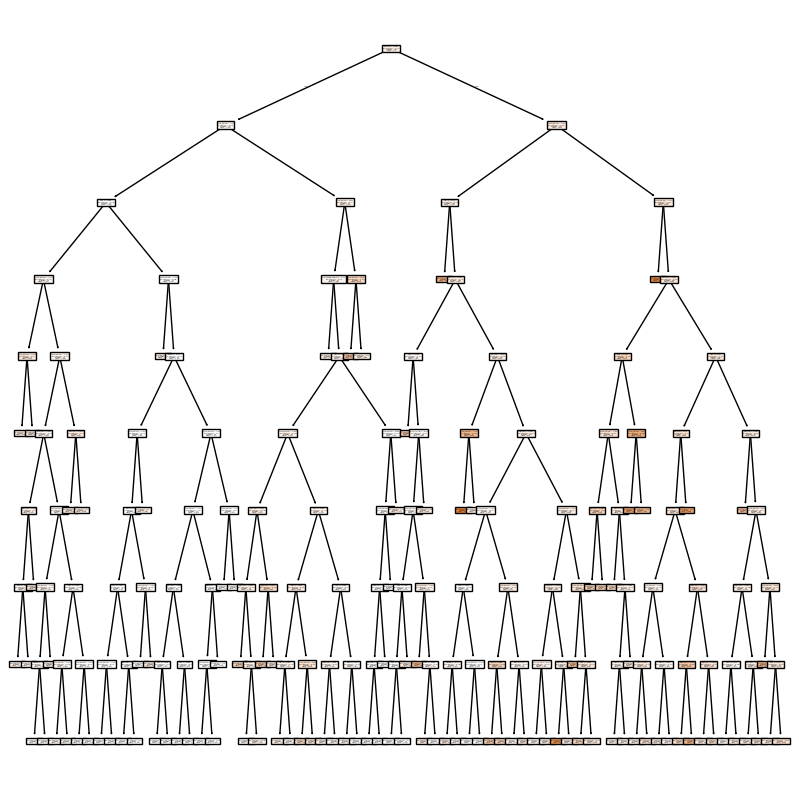

In [ ]:
# targel column = mass
X = train_normalized.drop(columns=["mass"])
y = train_normalized["mass"]

rgr3 = tree.DecisionTreeRegressor(max_depth=3)
rgr3 = rgr3.fit(X, y)
plt.figure(figsize=(10,10))
plot_tree(rgr3, feature_names=X.columns, filled=True)
plt.show()

rgr6 = tree.DecisionTreeRegressor(max_depth=6)
rgr6 = rgr6.fit(X, y)
plt.figure(figsize=(10,10))
plot_tree(rgr6, feature_names=X.columns, filled=True)
plt.show()

rgr9 = tree.DecisionTreeRegressor(max_depth=9)
rgr9 = rgr9.fit(X, y)
plt.figure(figsize=(10,10))
plot_tree(rgr9, feature_names=X.columns, filled=True)
plt.show()

In [ ]:
X_val = val_normalized.drop(columns=["mass"])
y_val = val_normalized["mass"]
X_test = test_normalized.drop(columns=["mass"])
y_test = test_normalized["mass"]

train_pred3 = rgr3.predict(X)
val_pred3 = rgr3.predict(X_val)

train_mse3 = mean_squared_error(y, train_pred3)
val_mse3 = mean_squared_error(y_val, val_pred3)

train_r2_3 = r2_score(y, train_pred3)
val_r2_3 = r2_score(y_val, val_pred3)


X_val = val_df.drop(columns=["mass"])
y_val = val_df["mass"]
X_test = test_df.drop(columns=["mass"])
y_test = test_df["mass"]

train_pred6 = rgr6.predict(X)
val_pred6 = rgr6.predict(X_val)

train_mse6 = mean_squared_error(y, train_pred6)
val_mse6 = mean_squared_error(y_val, val_pred6)

train_r2_6 = r2_score(y, train_pred6)
val_r2_6 = r2_score(y_val, val_pred6)

X_val = val_df.drop(columns=["mass"])
y_val = val_df["mass"]
X_test = test_df.drop(columns=["mass"])
y_test = test_df["mass"]

train_pred9 = rgr9.predict(X)
val_pred9 = rgr9.predict(X_val)

train_mse9 = mean_squared_error(y, train_pred9)
val_mse9 = mean_squared_error(y_val, val_pred9)

train_r2_9 = r2_score(y, train_pred9)
val_r2_9 = r2_score(y_val, val_pred9)

# max_depth = 3 показує кращі результати: найменше MSE, найбільше r2. Я думаю що через перенавчання 6 i 9 показують гірші результати

In [ ]:
forest = RandomForestRegressor(n_estimators=100, max_depth=9, random_state=42)
forest.fit(X, y)

train_pred = forest.predict(X)
val_pred = forest.predict(X_val)

train_mse = mean_squared_error(y, train_pred)
val_mse = mean_squared_error(y_val, val_pred)

train_r2 = r2_score(y, train_pred)
val_r2 = r2_score(y_val, val_pred)

In [ ]:
knn3 = KNeighborsRegressor(n_neighbors=3)
knn3.fit(X, y)
knn6 = KNeighborsRegressor(n_neighbors=6)
knn6.fit(X, y)
knn9 = KNeighborsRegressor(n_neighbors=9)
knn9.fit(X, y)

train_pred3 = knn3.predict(X)
val_pred3 = knn3.predict(X_val)
train_pred6 = knn6.predict(X)
val_pred6 = knn6.predict(X_val)
train_pred9 = knn9.predict(X)
val_pred9 = knn9.predict(X_val)

train_mse3 = mean_squared_error(y, train_pred3)
val_mse3 = mean_squared_error(y_val, val_pred3)
train_mse6 = mean_squared_error(y, train_pred6)
val_mse6 = mean_squared_error(y_val, val_pred6)
train_mse9 = mean_squared_error(y, train_pred9)
val_mse9 = mean_squared_error(y_val, val_pred9)

train_r2_3 = r2_score(y, train_pred3)
val_r2_3 = r2_score(y_val, val_pred3)
train_r2_6 = r2_score(y, train_pred6)
val_r2_6 = r2_score(y_val, val_pred6)
train_r2_9 = r2_score(y, train_pred9)
val_r2_9 = r2_score(y_val, val_pred9)

# K=3 показала найменшу похибку mse і найбільшу r^2. Я думаю що k=6 i k=9 приводять до недонавчання (бракує даних)

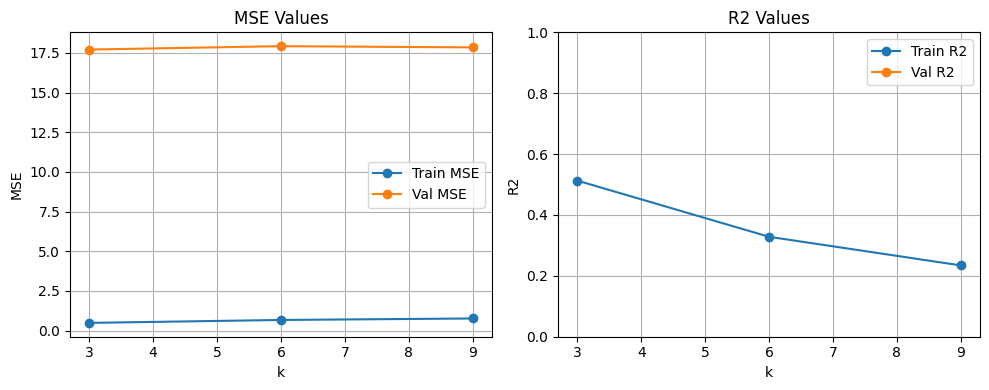

In [ ]:
k_values = [3, 6, 9]
train_mse = [train_mse3, train_mse6, train_mse9]
val_mse = [val_mse3, val_mse6, val_mse9]
train_r2 = [train_r2_3, train_r2_6, train_r2_9]
val_r2 = [val_r2_3, val_r2_6, val_r2_9]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, train_mse, marker='o', label='Train MSE')
plt.plot(k_values, val_mse, marker='o', label='Val MSE')
plt.title("MSE Values")
plt.xlabel("k")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, train_r2, marker='o', label='Train R2')
plt.plot(k_values, val_r2, marker='o', label='Val R2')
plt.title("R2 Values")
plt.xlabel("k")
plt.ylabel("R2")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(f"Decision Tree Regressor MAX_DEPTH 3: train_mse = {train_mse3}, val_mse = {val_mse3}, train_r2 = {train_r2_3}, val_r2 = {val_r2_3} ")
print(f"Decision Tree Regressor MAX_DEPTH 6: train_mse = {train_mse6}, val_mse = {val_mse6}, train_r2 = {train_r2_6}, val_r2 = {val_r2_6} ")
print(f"Decision Tree Regressor MAX_DEPTH 9: train_mse = {train_mse9}, val_mse = {val_mse9}, train_r2 = {train_r2_9}, val_r2 = {val_r2_9} ")

print(f"Random Forest: train_mse = {train_mse}, val_mse = {val_mse}, train_r2 = {train_r2}, val_r2 = {val_r2}")

print(f"K 3: train_mse = {train_mse3}, val_mse = {val_mse3}, train_r2 = {train_r2_3}, val_r2 = {val_r2_3} ")
print(f"K 6: train_mse = {train_mse6}, val_mse = {val_mse6}, train_r2 = {train_r2_6}, val_r2 = {val_r2_6} ")
print(f"K 9: train_mse = {train_mse9}, val_mse = {val_mse9}, train_r2 = {train_r2_9}, val_r2 = {val_r2_9} ")

# Decision Tree Regressor i KNN: При збільшенні глибини або K відповідно,
# результати погіршуються та збільшується MSE. K=3 та MAX_DEPTH=3 показали найкращі результати
# Random Forest показав найкращі результат, найнижчий MSE та найвищий r2 серед всіх моделей.

Decision Tree Regressor MAX_DEPTH 3: train_mse = 0.48647771158863123, val_mse = 17.71249096294262, train_r2 = 0.5128494285059866, val_r2 = -0.8036404769805647 
Decision Tree Regressor MAX_DEPTH 6: train_mse = 0.6707640441123492, val_mse = 17.92586219818472, train_r2 = 0.32830820478928835, val_r2 = -0.8253677990896429 
Decision Tree Regressor MAX_DEPTH 9: train_mse = 0.7646444807075614, val_mse = 17.848934367216764, train_r2 = 0.23429791973405445, val_r2 = -0.817534335686307 
Random Forest: train_mse = [0.48647771158863123, 0.6707640441123492, 0.7646444807075614], val_mse = [17.71249096294262, 17.92586219818472, 17.848934367216764], train_r2 = [0.5128494285059866, 0.32830820478928835, 0.23429791973405445], val_r2 = [-0.8036404769805647, -0.8253677990896429, -0.817534335686307]
K 3: train_mse = 0.48647771158863123, val_mse = 17.71249096294262, train_r2 = 0.5128494285059866, val_r2 = -0.8036404769805647 
K 6: train_mse = 0.6707640441123492, val_mse = 17.92586219818472, train_r2 = 0.328308